Medidas de Localización
===

* 17:13 min | Última modificación: Ocutbre 15, 2021 | [YouTube](https://youtu.be/AuOrK91rOUI)

In [1]:
import warnings

warnings.filterwarnings("ignore")

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

## Definición del problema 

El [conjunto de datos de la flor Iris](https://es.wikipedia.org/wiki/Iris_flor_conjunto_de_datos) contiene 150 muestras de las medidas del ancho y el largo del pétalo y del sépalo para las tres especies de esta flor (Iris setosa, Iris virginica e Iris versicolor). A partir de la muestra de datos se desean responder la siguiente pregunta:


* **P1**.--- ¿Cuál es la longitud y ancho típicos del pétalo y del sépalo para cada uno de los tis de flores?

## Carga de datos

In [3]:
#
# Se cargan los datos y se realiza una inspección
# inicial de la tabla y los datos
#
iris_df = sns.load_dataset("iris")

display(iris_df.head(), iris_df.tail())

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


## P1.--- ¿Cuál es la longitud y ancho típicos del pétalo y del sépalo para cada uno de los tipos de flores?

En esta pregunta se esta pidiendo una medida o estimación de localización del valor típico de la longitud del pétalo. Existen varias medidas.

In [4]:
iris_melt = iris_df.copy()
iris_melt = pd.melt(
    iris_melt,
    id_vars="species",
    var_name="Variables",
    value_name="Values",
)

iris_melt.head()

,species,Variables,Values
0,setosa,sepal_length,5.1
1,setosa,sepal_length,4.9
2,setosa,sepal_length,4.7
3,setosa,sepal_length,4.6
4,setosa,sepal_length,5.0


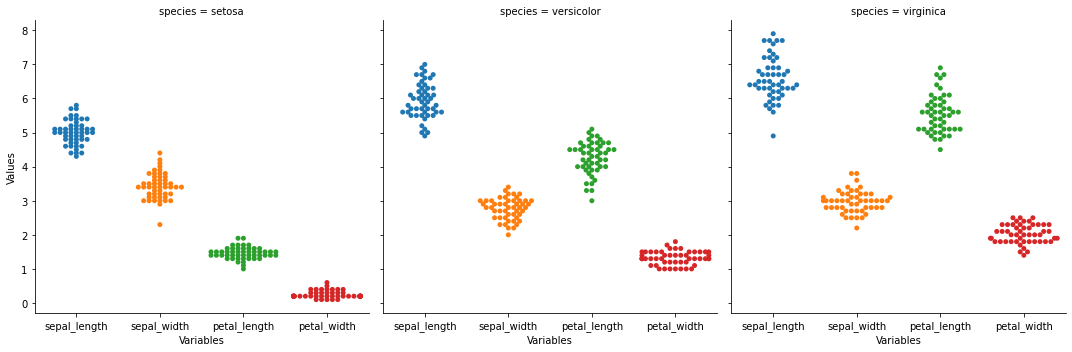

In [5]:
#
# Esta gráfica permite comparar los valores de las variables para una misma
# especie (no muy util para inferir conclusiones)
#
sns.catplot(
    x="Variables",
    y="Values",
    data=iris_melt,
    col="species",
    kind="swarm",
)
plt.show()

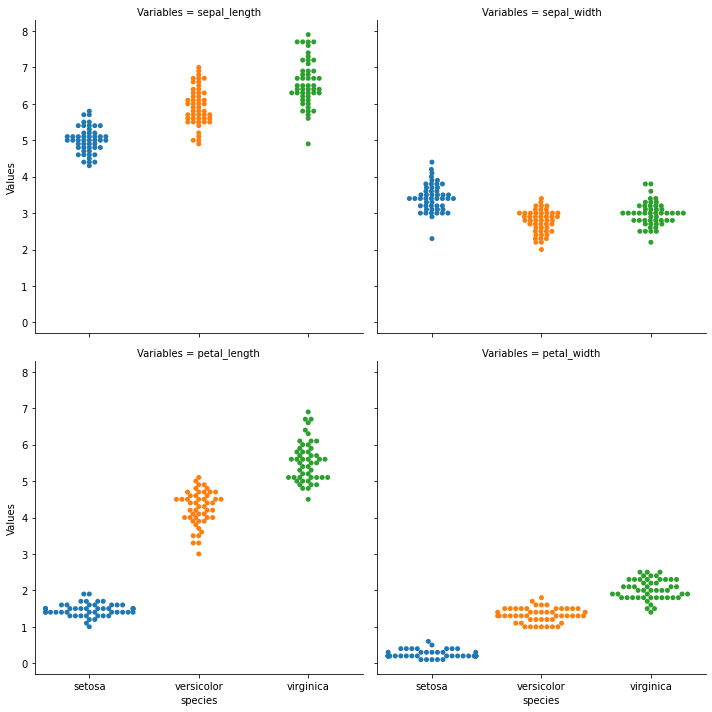

In [6]:
#
# Esta gráfica permite comparar una variable entre especies
#
sns.catplot(
    x="species",
    y="Values",
    data=iris_melt,
    col="Variables",
    kind="swarm",
    col_wrap=2,
)
plt.show()

**Media o promedio muestral:**

Valor "típico" de los datos.

$$\bar{x} = \frac{1}{n} \sum_{i=1}^n x_i$$

In [7]:
#
# Cálculo para una variable
#
from statistics import mean

display(
    iris_df.sepal_length.mean(),
    mean(iris_df.sepal_length),
    np.mean(iris_df.sepal_length),
)

5.843333333333334

5.843333333333334

5.843333333333334

In [8]:
#
# Cálculo para las columnas numéricas del
# dataframe
#
iris_df.mean()

sepal_length    5.843333
sepal_width     3.057333
petal_length    3.758000
petal_width     1.199333
dtype: float64

In [9]:
#
# Cálculo de la media de cada columna por especie
#
iris_df.groupby("species").mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


**Media ponderada:** 

$$\bar{x} = \frac{1}{\sum_{i=1}^n w_i} \sum_{i=1}^n w_i x_i$$

**Outlier o valor atípico:** 

Valores extremadamente distantes del resto de los datos. En algunos casos se pueden definir en términos de la media y la desviación estándar de la muestra; por ejemplo, se considera outliers aquellas observaciones distantes más de 3.5$\sigma$ de la media. 

**Media truncada:** 

Se calcula la media sobre los datos después de eliminar los $p$ datos más pequeños y los $p$ datos más grandes. Si $x_{(1)}$, $x_{2}$, ..., $x_{(n)}$ representan los datos ordenados, donde $x_{(1)}$ es el dato más pequeño y $x_{(n)}$ el más grande, entonces la media truncada se calcula como:

$$\frac{1}{n-2p} \sum_{i=1+p}^{n-p} x_i$$

**Mediana:** 

Es el valor $x_{((n+1)/2)}$ cuando se ordenan los datos. Es una aproximación robusta (no influenciada por datos atípicos o distribuciones asimétricas.

In [10]:
#
# Cálculo para una variable
#
from statistics import median

display(
    iris_df.sepal_length.median(),
    median(iris_df.sepal_length),
    np.median(iris_df.sepal_length),
)

5.8

5.8

5.8

In [11]:
#
# Cálculo para las columnas del dataframe
#
iris_df.median()

sepal_length    5.80
sepal_width     3.00
petal_length    4.35
petal_width     1.30
dtype: float64

In [12]:
#
# Cálculo discriminando por especie
#
iris_df.groupby("species").median()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.0,3.4,1.50,0.2
versicolor,5.9,2.8,4.35,1.3
virginica,6.5,3.0,5.55,2.0


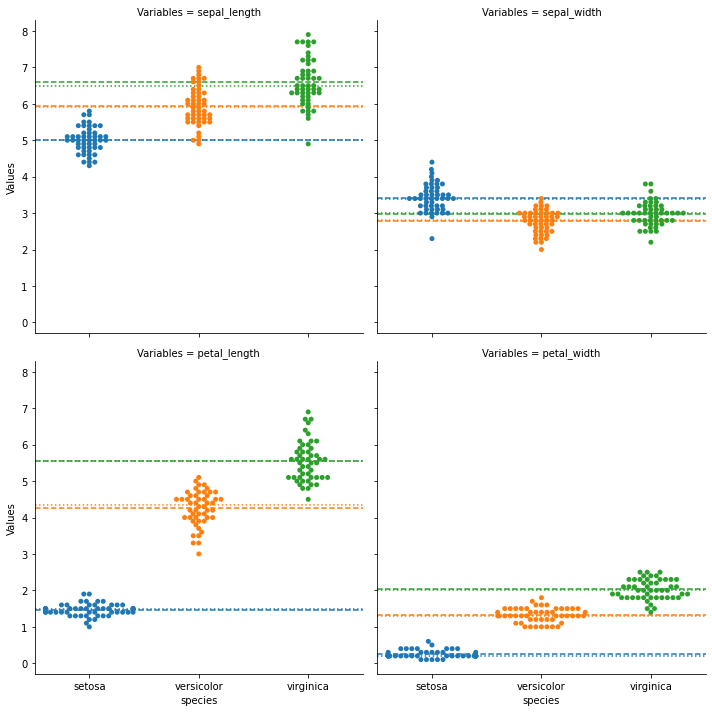

In [13]:
g = sns.catplot(
    x="species",
    y="Values",
    data=iris_melt,
    col="Variables",
    kind="swarm",
    col_wrap=2,
)

colors = ['tab:blue', 'tab:orange', 'tab:green']


means = iris_df.groupby("species").mean()
medians = iris_df.groupby("species").median()

for i_axes in range(4):
    ax = g.axes[i_axes]
    mean_values = means[means.columns[i_axes]]
    median_values = medians[medians.columns[i_axes]]
    for color, mean_value, median_value in zip(colors, mean_values, median_values):
        g.axes[i_axes].axhline(mean_value, ls='--', color=color)
        g.axes[i_axes].axhline(median_value, ls=':', color=color)
                        


plt.show()

**Moda:**

In [14]:
#
# Cálculo para una variable
#
from statistics import mode

from scipy import stats

display(
    iris_df.sepal_length.mode(),
    mode(iris_df.sepal_length),
    stats.mode(iris_df.sepal_length),
)

0    5.0
dtype: float64

5.0

ModeResult(mode=array([5.]), count=array([10]))

In [15]:
#
# Cálculo para las columnas del dataframe
#
iris_df.mode()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.0,3.0,1.4,0.2,setosa
1,NaN,NaN,1.5,NaN,versicolor
2,NaN,NaN,NaN,NaN,virginica
